<a href="https://colab.research.google.com/github/BunnyFire/BunnyFire/blob/main/ML_price_prediction_BCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prediction of BCH price for next 30 days 
#Today is 19/05/2021
#Import the libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2020-05-31_2021-05-30-CoinDesk.csv to BTC_USD_2020-05-31_2021-05-30-CoinDesk.csv


In [ ]:
#Store the data into a variable
df = pd.read_csv('BTC_USD_2020-05-31_2021-05-30-CoinDesk.csv')

#Show the first 7 rows of the data
df.head(7)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-05-31,9688.324390,9434.033792,9732.943979,9334.912832
1,BTC,2020-06-01,9427.670084,9688.539932,9698.140854,9394.275387
2,BTC,2020-06-02,10268.581985,9427.232535,10357.789166,9417.354212
3,BTC,2020-06-03,9516.135443,10268.231877,10292.703097,9298.920950
4,BTC,2020-06-04,9667.060754,9516.379828,9680.206444,9406.971187
5,BTC,2020-06-05,9811.367095,9667.085402,9875.662127,9472.251048
6,BTC,2020-06-06,9659.661298,9811.829378,9860.231447,9619.617459


In [ ]:
# Remove the date column
df.drop(['Date'],1,inplace = True)
df.drop(['Currency'],1,inplace = True)
df.drop(['24h Open (USD)'],1,inplace = True)
df.drop(['24h High (USD)'],1,inplace = True)
df.drop(['24h Low (USD)'],1,inplace = True)

In [ ]:
#Show the first 7 rows
df.head(7)

,Closing Price (USD)
0,9688.324390
1,9427.670084
2,10268.581985
3,9516.135443
4,9667.060754
5,9811.367095
6,9659.661298


In [ ]:
# A varible for predicting 'n' days into the future
prediction_days = 30 #n = prediction_days = 30

#Create another column shifted in 'n' units up
df['Prediction'] = df[['Closing Price (USD)']].shift(-prediction_days)

In [ ]:
#Show the first 7 rows
df.head(7)

,Closing Price (USD),Prediction
0,9688.324390,9188.061375
1,9427.670084,9148.444859
2,10268.581985,9236.316770
3,9516.135443,9097.797366
4,9667.060754,9094.324561
5,9811.367095,9124.653534
6,9659.661298,9055.464483


In [ ]:
#Show last 7 days of the data
df.tail(7)

,Closing Price (USD),Prediction
358,34259.548416,NaN
359,38085.789361,NaN
360,38290.448528,NaN
361,38915.004829,NaN
362,38717.769220,NaN
363,34898.008720,NaN
364,34535.522468,NaN


In [ ]:
#Create the independent data set
#Convert the df to numpy array
X= np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction
X = X[:len(df)-prediction_days]
print(X)

[[ 9688.32439037]
 [ 9427.67008414]
 [10268.58198473]
 [ 9516.13544309]
 [ 9667.06075426]
 [ 9811.3670946 ]
 [ 9659.66129819]
 [ 9677.05099451]
 [ 9737.45855879]
 [ 9791.92789977]
 [ 9786.14202048]
 [ 9874.96704752]
 [ 9260.83264099]
 [ 9464.22809682]
 [ 9458.6597544 ]
 [ 9351.95372801]
 [ 9441.76899555]
 [ 9510.66063729]
 [ 9457.62707441]
 [ 9398.64209362]
 [ 9279.76076517]
 [ 9353.07819619]
 [ 9289.10449144]
 [ 9680.9471279 ]
 [ 9609.68024553]
 [ 9311.13631832]
 [ 9252.63337177]
 [ 9171.73208577]
 [ 9022.153768  ]
 [ 9101.85005736]
 [ 9188.06137546]
 [ 9148.44485856]
 [ 9236.31677043]
 [ 9097.79736639]
 [ 9094.32456102]
 [ 9124.6535344 ]
 [ 9055.46448252]
 [ 9278.80563704]
 [ 9244.41581454]
 [ 9471.75997342]
 [ 9236.14325371]
 [ 9243.17525915]
 [ 9229.85975494]
 [ 9286.73704209]
 [ 9238.99375486]
 [ 9260.47098018]
 [ 9211.02643289]
 [ 9133.77783034]
 [ 9160.41059149]
 [ 9176.6863901 ]
 [ 9190.2715342 ]
 [ 9172.58833257]
 [ 9395.06444588]
 [ 9530.79088535]
 [ 9617.37786138]
 [ 9568.97

In [ ]:
#Create the dependent data Set
#Convert the dataframe to a numpy array
y = np.array(df['Prediction'])

#Get all the values except the last 'n' rows

y = y[:-prediction_days]
print(y)

[ 9188.06137546  9148.44485856  9236.31677043  9097.79736639
  9094.32456102  9124.6535344   9055.46448252  9278.80563704
  9244.41581454  9471.75997342  9236.14325371  9243.17525915
  9229.85975494  9286.73704209  9238.99375486  9260.47098018
  9211.02643289  9133.77783034  9160.41059149  9176.6863901
  9190.2715342   9172.58833257  9395.06444588  9530.79088535
  9617.37786138  9568.97472596  9708.9491401   9938.95122286
 11187.77972696 10939.67014155 11284.45898685 11118.91841243
 11373.31725664 11766.74829709 11139.09838035 11261.80633174
 11228.02632402 11653.40758556 11796.81736499 11639.93541013
 11744.9120755  11673.12323754 11832.22730813 11340.58234064
 11549.54631437 11752.16865623 11783.28341126 11895.62694989
 11896.94717019 12399.11188466 12071.73890908 11749.82950876
 11833.8973487  11583.13894263 11674.62435391 11666.41012224
 11744.01269665 11378.72602981 11458.82259649 11302.1209645
 11482.22568651 11515.04443069 11657.00393423 11678.37325542
 11964.20867246 11427.7026

In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Set the prediction_days_array= last 30 rows from the original data set
prediction_days_array= np.array(df.drop(['Prediction'], 1))[-prediction_days:]
print(prediction_days_array)

[[57302.64642408]
 [57677.9752219 ]
 [56427.04312502]
 [57255.30683756]
 [53658.84312082]
 [57252.7021845 ]
 [56583.84987917]
 [57107.12067189]
 [58788.20967893]
 [58102.19142623]
 [55715.54665129]
 [56573.5554719 ]
 [52147.82118698]
 [49764.1320816 ]
 [50032.69313676]
 [47885.62525472]
 [45604.61575361]
 [43144.47129086]
 [43196.04648002]
 [39439.23763545]
 [39756.08984854]
 [36921.76780796]
 [37490.9418876 ]
 [34259.54841587]
 [38085.78936062]
 [38290.44852818]
 [38915.0048286 ]
 [38717.76921992]
 [34898.00871956]
 [34535.52246756]]


In [ ]:
from sklearn.svm import SVR

#Create and train the support vector machine using regression using radial basis function
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma= 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Test the model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf_accuracy:", svr_rbf_confidence)

svr_rbf_accuracy: 0.5446772132500944


In [ ]:
#Print the predicted values
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

print(y_test) #actual values

[30915.31973541 13270.09858732 33011.61654769 28987.49653251
 30322.68729203 16259.70937817 30946.33317129 30204.31291618
 31804.30901736 13646.43992662 14275.04498601 16843.15524739
 10973.00140019 34014.48658633 32624.31904832 29101.98133164
 13955.98802544 29620.07764976 17240.60421483 13252.02118872
 33757.0677532  13539.59752057 11146.41168756 32408.40289152
 25043.69105593 10971.92539834 34069.04776225 31159.32962184
 14976.31165884 11071.88104371 28101.95273749 29213.12683136
 32513.62818409 17102.66724594 32362.75192532 30678.10490807
 19347.3580179  30373.9097734  16378.72077626 17880.62061432
 31178.02569758 16665.28623983 28622.72422154 12842.86380651
 14491.29258716 30310.88414776 12877.59075103 16805.42223071
 29082.912115   26572.39959329 30339.86603994 14217.16707077
 30290.34339357 28061.33868516 31964.85279764 32344.21862648
 17010.35632539 11093.74107609 32487.71155406 15190.01044037
 24759.43215917 12936.5978711  14622.06757414 33502.10566798
 15105.6940515  11558.44

In [ ]:
#Print the model for next 'n' = 30 days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

print()
#Print actual values
print(df)

[33145.37306431 34546.72872551 33031.82086377 33020.6516494
 30891.84738989 33014.97644026 32463.53910055 32852.47567655
 34164.43053792 33248.31559687 31079.52043723 32490.81470524
 32515.31506105 29668.29407811 29683.12172137 33298.61717623
 30757.58589534 29620.07764977 29620.07764984 30096.90111496
 30655.41472241 32106.19503987 31495.57958287 31195.35854341
 30521.68520563 30747.93638893 30378.71378028 31071.75136803
 31694.83660633 31875.29896362]

     Closing Price (USD)   Prediction
0            9688.324390  9188.061375
1            9427.670084  9148.444859
2           10268.581985  9236.316770
3            9516.135443  9097.797366
4            9667.060754  9094.324561
..                   ...          ...
360         38290.448528          NaN
361         38915.004829          NaN
362         38717.769220          NaN
363         34898.008720          NaN
364         34535.522468          NaN

[365 rows x 2 columns]


In [ ]:
#Plot the prediction for last 30 days
df = pd.DataFrame(svm_prediction, columns= ['Price Prediction (USD)'])

In [ ]:
#Print the newly created dataframe
print(df)

    Price Prediction (USD)
0             33145.373064
1             34546.728726
2             33031.820864
3             33020.651649
4             30891.847390
5             33014.976440
6             32463.539101
7             32852.475677
8             34164.430538
9             33248.315597
10            31079.520437
11            32490.814705
12            32515.315061
13            29668.294078
14            29683.121721
15            33298.617176
16            30757.585895
17            29620.077650
18            29620.077650
19            30096.901115
20            30655.414722
21            32106.195040
22            31495.579583
23            31195.358543
24            30521.685206
25            30747.936389
26            30378.713780
27            31071.751368
28            31694.836606
29            31875.298964


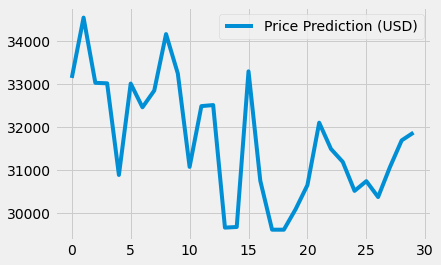

In [ ]:
#Plot the newly created data frame:
import matplotlib.pyplot as plt
df.plot()

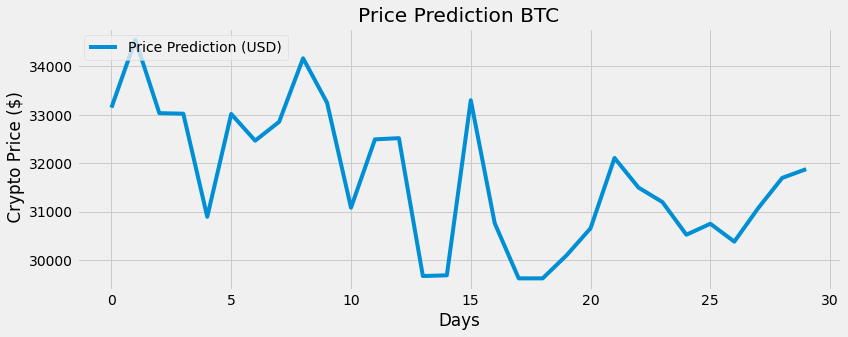

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
prediction_BCH = df
plt.figure(figsize = (12.2, 4.5))
for c in prediction_BCH.columns.values:
  plt.plot(prediction_BCH[c],label = c)

plt.title('Price Prediction BTC')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(prediction_BCH.columns.values, loc = 'upper left')
plt.show()